In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [2]:
data=pd.read_csv('brain_1.csv')
data.head(5)


Mean     Variance  Standard Deviation   Entropy  Skewness   Kurtosis  \
0  23.448517  2538.985627           50.388348  0.651174  1.984202   5.421042   
1   4.398331   834.853030           28.893823  0.953532  6.495203  43.349355   
2   3.244263   642.059166           25.338886  0.966065  7.772860  61.756034   
3   8.511353  1126.214187           33.559115  0.868765  3.763142  15.107579   
4  21.000793  2235.316978           47.279139  0.684724  1.936029   4.722343   

     Contrast    Energy       ASM  Homogeneity  Dissimilarity  Correlation  \
0  181.467713  0.781557  0.610831     0.847033       2.765411     0.968576   
1   76.745886  0.972770  0.946281     0.980762       0.548605     0.959751   
2   81.752406  0.980161  0.960715     0.985066       0.540411     0.944259   
3  362.291213  0.921786  0.849690     0.949295       2.765725     0.859027   
4  312.439226  0.804184  0.646711     0.880301       3.006660     0.938572   

      Coarseness        PSNR      SSIM       MSE  Target  
0  7.460000e-155   97.974630  0.777011  0.171163       1  
1  7.460000e-155  110.346597  0.977953  0.009913       1  
2  7.460000e-155  112.266298  0.985362  0.006372       1  
3  7.460000e-155  101.955792  0.881015  0.068437       0  
4  7.460000e-155   97.639870  0.766308  0.184878       0

In [3]:
data.tail()

Mean    Variance  Standard Deviation   Entropy   Skewness  \
1639  0.199158   26.491880            5.147026  0.996341  25.826301   
1640  6.885025  802.478515           28.328052  0.878419   3.939967   
1641  1.828186  230.107684           15.169301  0.966424   8.218790   
1642  0.061630    8.029570            2.833650  0.998740  45.985085   
1643  0.718506   91.460572            9.563502  0.986739  13.268497   

         Kurtosis    Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
1639   668.181974   14.797350  0.997873  0.995751     0.998476       0.113842   
1640    16.456794  266.135425  0.927687  0.860602     0.951086       2.303173   
1641    68.539071  105.172699  0.980371  0.961128     0.985590       0.863250   
1642  2116.600001    6.431276  0.999268  0.998536     0.999401       0.050628   
1643   177.139371   42.023257  0.992277  0.984614     0.994537       0.341771   

      Correlation     Coarseness       PSNR      SSIM       MSE  Target  
1639     0.755553  7.460000e-155  75.822768  0.995798  0.001701       0  
1640     0.854682  7.460000e-155  60.126402  0.886831  0.063160       0  
1641     0.799919  7.460000e-155  66.013000  0.964771  0.016285       0  
1642     0.649484  7.460000e-155  80.821411  0.998316  0.000538       0  
1643     0.798902  7.460000e-155  70.076550  0.985988  0.006389       0

In [4]:
data.shape

(1644, 17)

In [5]:
data.describe()

Mean     Variance  Standard Deviation      Entropy     Skewness  \
count  1644.000000  1644.000000         1644.000000  1644.000000  1275.000000   
mean      3.125191   377.214252           14.206369     0.949141    16.996439   
std       5.359059   548.174013           13.247645     0.094175    21.247054   
min       0.000000     0.000000            0.000000     0.530684     1.219356   
25%       0.037800     6.030021            2.455609     0.951339     5.437071   
50%       0.798752   123.306078           11.104325     0.988411     9.377379   
75%       3.584896   548.029238           23.409950     0.999407    20.319678   
max      31.031021  3345.853590           57.843354     1.000000   255.994850   

           Kurtosis     Contrast       Energy          ASM  Homogeneity  \
count   1275.000000  1644.000000  1644.000000  1644.000000  1644.000000   
mean     742.215017    58.206011     0.968980     0.942412     0.979727   
std     2934.685940    76.370330     0.059090     0.105063     0.036854   
min        2.502720     0.000000     0.695889     0.484262     0.811102   
25%       30.567200     4.189331     0.971472     0.943758     0.980386   
50%       88.954857    32.275087     0.993253     0.986552     0.995027   
75%      415.828216    80.164627     0.999656     0.999311     0.999712   
max    65534.242200   743.368131     1.000000     1.000000     1.000000   

       Dissimilarity  Correlation     Coarseness         PSNR         SSIM  \
count    1644.000000  1644.000000   1.644000e+03  1644.000000  1275.000000   
mean        0.546093     0.895361  7.460000e-155          inf     0.939480   
std         0.779876     0.115596   0.000000e+00          NaN     0.066399   
min         0.000000    -0.000035  7.460000e-155    53.378482     0.675997   
25%         0.029637     0.856232  7.460000e-155    62.394514     0.936873   
50%         0.249390     0.925825  7.460000e-155    65.822770     0.961182   
75%         0.679472     0.972652  7.460000e-155    72.015149     0.977311   
max         5.604428     1.000000  7.460000e-155          inf     0.999253   

               MSE       Target  
count  1644.000000  1644.000000  
mean      0.036449     0.881387  
std       0.051187     0.323431  
min       0.000000     0.000000  
25%       0.007639     1.000000  
50%       0.020226     1.000000  
75%       0.041185     1.000000  
max       0.298698     1.000000

In [6]:
data.columns

Index(['Mean', 'Variance', 'Standard Deviation', 'Entropy', 'Skewness',
       'Kurtosis', 'Contrast', 'Energy', 'ASM', 'Homogeneity', 'Dissimilarity',
       'Correlation', 'Coarseness', 'PSNR', 'SSIM', 'MSE', 'Target'],
      dtype='object')

In [7]:
data.isnull().sum()

Mean                    0
Variance                0
Standard Deviation      0
Entropy                 0
Skewness              369
Kurtosis              369
Contrast                0
Energy                  0
ASM                     0
Homogeneity             0
Dissimilarity           0
Correlation             0
Coarseness              0
PSNR                    0
SSIM                  369
MSE                     0
Target                  0
dtype: int64

In [8]:
data = data.dropna()


In [9]:

data.isnull().sum()

Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
PSNR                  0
SSIM                  0
MSE                   0
Target                0
dtype: int64

In [104]:
data.shape

(1275, 17)

In [144]:
data['Target'].value_counts()

1    1178
0      97
Name: Target, dtype: int64

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1275 entries, 0 to 1643
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mean                1275 non-null   float64
 1   Variance            1275 non-null   float64
 2   Standard Deviation  1275 non-null   float64
 3   Entropy             1275 non-null   float64
 4   Skewness            1275 non-null   float64
 5   Kurtosis            1275 non-null   float64
 6   Contrast            1275 non-null   float64
 7   Energy              1275 non-null   float64
 8   ASM                 1275 non-null   float64
 9   Homogeneity         1275 non-null   float64
 10  Dissimilarity       1275 non-null   float64
 11  Correlation         1275 non-null   float64
 12  Coarseness          1275 non-null   float64
 13  PSNR                1275 non-null   float64
 14  SSIM                1275 non-null   float64
 15  MSE                 1275 non-null   float64
 16  Target

In [10]:
#SPLITTING TEST AND TRAIN DATA
X = data.iloc[:,0:16]


In [11]:
X

Mean     Variance  Standard Deviation   Entropy   Skewness  \
0     23.448517  2538.985627           50.388348  0.651174   1.984202   
1      4.398331   834.853030           28.893823  0.953532   6.495203   
2      3.244263   642.059166           25.338886  0.966065   7.772860   
3      8.511353  1126.214187           33.559115  0.868765   3.763142   
4     21.000793  2235.316978           47.279139  0.684724   1.936029   
...         ...          ...                 ...       ...        ...   
1639   0.199158    26.491880            5.147026  0.996341  25.826301   
1640   6.885025   802.478515           28.328052  0.878419   3.939967   
1641   1.828186   230.107684           15.169301  0.966424   8.218790   
1642   0.061630     8.029570            2.833650  0.998740  45.985085   
1643   0.718506    91.460572            9.563502  0.986739  13.268497   

         Kurtosis    Contrast    Energy       ASM  Homogeneity  Dissimilarity  \
0        5.421042  181.467713  0.781557  0.610831     0.847033       2.765411   
1       43.349355   76.745886  0.972770  0.946281     0.980762       0.548605   
2       61.756034   81.752406  0.980161  0.960715     0.985066       0.540411   
3       15.107579  362.291213  0.921786  0.849690     0.949295       2.765725   
4        4.722343  312.439226  0.804184  0.646711     0.880301       3.006660   
...           ...         ...       ...       ...          ...            ...   
1639   668.181974   14.797350  0.997873  0.995751     0.998476       0.113842   
1640    16.456794  266.135425  0.927687  0.860602     0.951086       2.303173   
1641    68.539071  105.172699  0.980371  0.961128     0.985590       0.863250   
1642  2116.600001    6.431276  0.999268  0.998536     0.999401       0.050628   
1643   177.139371   42.023257  0.992277  0.984614     0.994537       0.341771   

      Correlation     Coarseness        PSNR      SSIM       MSE  
0        0.968576  7.460000e-155   97.974630  0.777011  0.171163  
1        0.959751  7.460000e-155  110.346597  0.977953  0.009913  
2        0.944259  7.460000e-155  112.266298  0.985362  0.006372  
3        0.859027  7.460000e-155  101.955792  0.881015  0.068437  
4        0.938572  7.460000e-155   97.639870  0.766308  0.184878  
...           ...            ...         ...       ...       ...  
1639     0.755553  7.460000e-155   75.822768  0.995798  0.001701  
1640     0.854682  7.460000e-155   60.126402  0.886831  0.063160  
1641     0.799919  7.460000e-155   66.013000  0.964771  0.016285  
1642     0.649484  7.460000e-155   80.821411  0.998316  0.000538  
1643     0.798902  7.460000e-155   70.076550  0.985988  0.006389  

[1275 rows x 16 columns]

In [12]:
Y= data['Target']


In [110]:
Y

0       1
1       1
2       1
3       0
4       0
       ..
1639    0
1640    0
1641    0
1642    0
1643    0
Name: Target, Length: 1275, dtype: int64

In [13]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=100)

In [14]:
X_train.shape

(892, 16)

In [113]:
X_test.shape

(383, 17)

In [40]:
from sklearn.metrics import accuracy_score,confusion_matrix

from sklearn.linear_model import LogisticRegression 

from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [41]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()

bnb = BernoulliNB() 
gnb =  GaussianNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc  = BaggingClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [43]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    
    'BNB': bnb,
    'GNB': gnb,
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'GBDT':gbdt,
    'xgb':xgb
}

In [44]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    
    
    return accuracy

In [45]:
train_classifier(bnb,X_train,y_train,X_test,y_test)

0.9138381201044387

In [46]:
gnb=GaussianNB()
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))


85.37859007832898
[[ 14  19]
 [ 37 313]]


In [47]:
y_pred1

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,

In [48]:
accuracy_scores = []

for name,clf in clfs.items():
    
    current_accuracy = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    
    accuracy_scores.append(current_accuracy)

For  SVC
Accuracy -  0.9138381201044387
For  KN
Accuracy -  0.9086161879895561
For  BNB
Accuracy -  0.9138381201044387
For  GNB
Accuracy -  0.8537859007832899
For  DT
Accuracy -  0.9086161879895561
For  LR
Accuracy -  0.9164490861618799
For  RF
Accuracy -  0.9295039164490861
For  AdaBoost
Accuracy -  0.9060052219321149
For  BgC
Accuracy -  0.9268929503916449
For  GBDT
Accuracy -  0.9216710182767625
[10:00:49] WARNING: /Users/mac/xgboost-1.4.2/build/temp.macosx-10.9-x86_64-3.9/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/mac/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/mac/anaconda3/lib/python3.9/site-packages/xgboost/data.py:208: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


For  xgb
Accuracy -  0.9268929503916449


In [49]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores})

In [50]:
performance_df

Algorithm  Accuracy
0        SVC  0.913838
1         KN  0.908616
2        BNB  0.913838
3        GNB  0.853786
4         DT  0.908616
5         LR  0.916449
6         RF  0.929504
7   AdaBoost  0.906005
8        BgC  0.926893
9       GBDT  0.921671
10       xgb  0.926893

<BarContainer object of 11 artists>

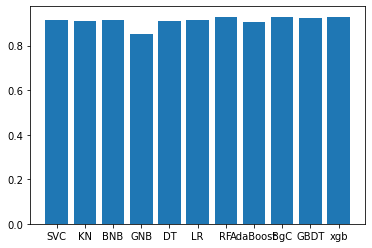

In [51]:
import matplotlib.pyplot as plt
x = clfs.keys()
y = accuracy_scores
plt.bar(x, y)

In [52]:

rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred2 = rfc.predict(X_test)




In [53]:
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [54]:
y_test

129     1
652     1
1354    1
172     1
1424    1
       ..
1184    1
903     1
1307    1
1593    1
1358    1
Name: Target, Length: 383, dtype: int64

In [55]:
# BG Classifier

In [56]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred2 = rfc.predict(X_test)
print(accuracy_score(y_test,y_pred1)*100)
print(confusion_matrix(y_test,y_pred1))

85.37859007832898
[[ 14  19]
 [ 37 313]]


In [57]:
# Predict Brain tumor

In [61]:
patient1=[3.244262695,642.0591665,25.33888645,0.966064536,7.772860172,61.75603423,81.75240586,0.980160923,0.960715435,0.985065941,0.540411437,0.94425866,7.46E-155,112.2662978,0.985362024,0.006371528]

In [62]:
patient1=np.array([patient1])

In [63]:
bc.predict(patient1)

/Users/mac/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


array([1])

In [64]:
pred=rfc.predict(patient1)

/Users/mac/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [65]:
if pred[0]==0:
    print("patient as  No Brain Tumor")
else:
     print("patient as Brain Tumor")

patient as Brain Tumor
